In [184]:
# Import Modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Display all of the columns
pd.set_option('display.max_columns', None)

In [185]:
# Read the CSV file into a Pandas DataFrame
credit_df = pd.read_csv(
    Path('Resources/cleaned_data_v2.csv')
)
credit_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,28,_______,34847.84,2,4,6,1,3,4,5.42,2,Good,605.03,24.46,26.6,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard
1,28,Teacher,34847.84,2,4,6,1,7,1,7.42,2,Good,605.03,38.55,26.7,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
2,28,Teacher,34847.84,2,4,6,1,3,3,5.42,2,Good,605.03,39.18,26.8,No,18.82,99.31,Low_spent_Medium_value_payments,465.68,Good
3,28,Teacher,34847.84,2,4,6,1,3,1,6.42,2,Good,605.03,34.98,26.9,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good
4,28,Teacher,34847.84,2,4,6,1,3,0,5.42,2,Good,605.03,33.38,27.0,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good


In [186]:
# Split target column from dataset
y = credit_df['Credit_Score']
columns_to_drop = ['Credit_Score', 'Occupation', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                  'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Mix']
X = credit_df.drop(columns=columns_to_drop)

In [187]:
# Preview the data
X[:5]

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Monthly_Balance
0,28,34847.84,2,4,6,3,4,5.42,2,605.03,470.69
1,28,34847.84,2,4,6,7,1,7.42,2,605.03,484.59
2,28,34847.84,2,4,6,3,3,5.42,2,605.03,465.68
3,28,34847.84,2,4,6,3,1,6.42,2,605.03,444.87
4,28,34847.84,2,4,6,3,0,5.42,2,605.03,481.51


In [188]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [189]:
# Preview the data
X.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Monthly_Balance
0,28,34847.84,2,4,6,3,4,5.42,2,605.03,470.69
1,28,34847.84,2,4,6,7,1,7.42,2,605.03,484.59
2,28,34847.84,2,4,6,3,3,5.42,2,605.03,465.68
3,28,34847.84,2,4,6,3,1,6.42,2,605.03,444.87
4,28,34847.84,2,4,6,3,0,5.42,2,605.03,481.51


In [190]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.075, random_state=1)

In [191]:
X_train.shape

(32692, 11)

In [192]:
X_test.shape

(2651, 11)

In [193]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [194]:
model = KNeighborsClassifier(n_neighbors=2)

In [195]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [196]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array(['Poor', 'Standard', 'Poor', ..., 'Poor', 'Good', 'Good'],
      dtype=object)

In [197]:
# Print confusion matrix
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[481  17 260]
 [  8 576 228]
 [ 65  62 954]]


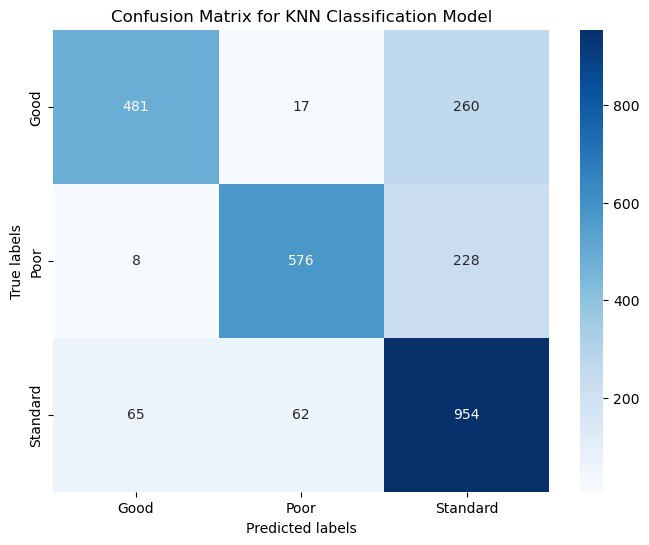

In [198]:
# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues',xticklabels=['Good', 'Poor', 'Standard'], yticklabels=['Good', 'Poor', 'Standard'], fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Classification Model')
plt.show()

In [199]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        Good       0.87      0.63      0.73       758
        Poor       0.88      0.71      0.79       812
    Standard       0.66      0.88      0.76      1081

    accuracy                           0.76      2651
   macro avg       0.80      0.74      0.76      2651
weighted avg       0.79      0.76      0.76      2651



In [200]:
#Check performance using accuracy
print(accuracy_score(y_test, y_pred))

0.7585816672953603


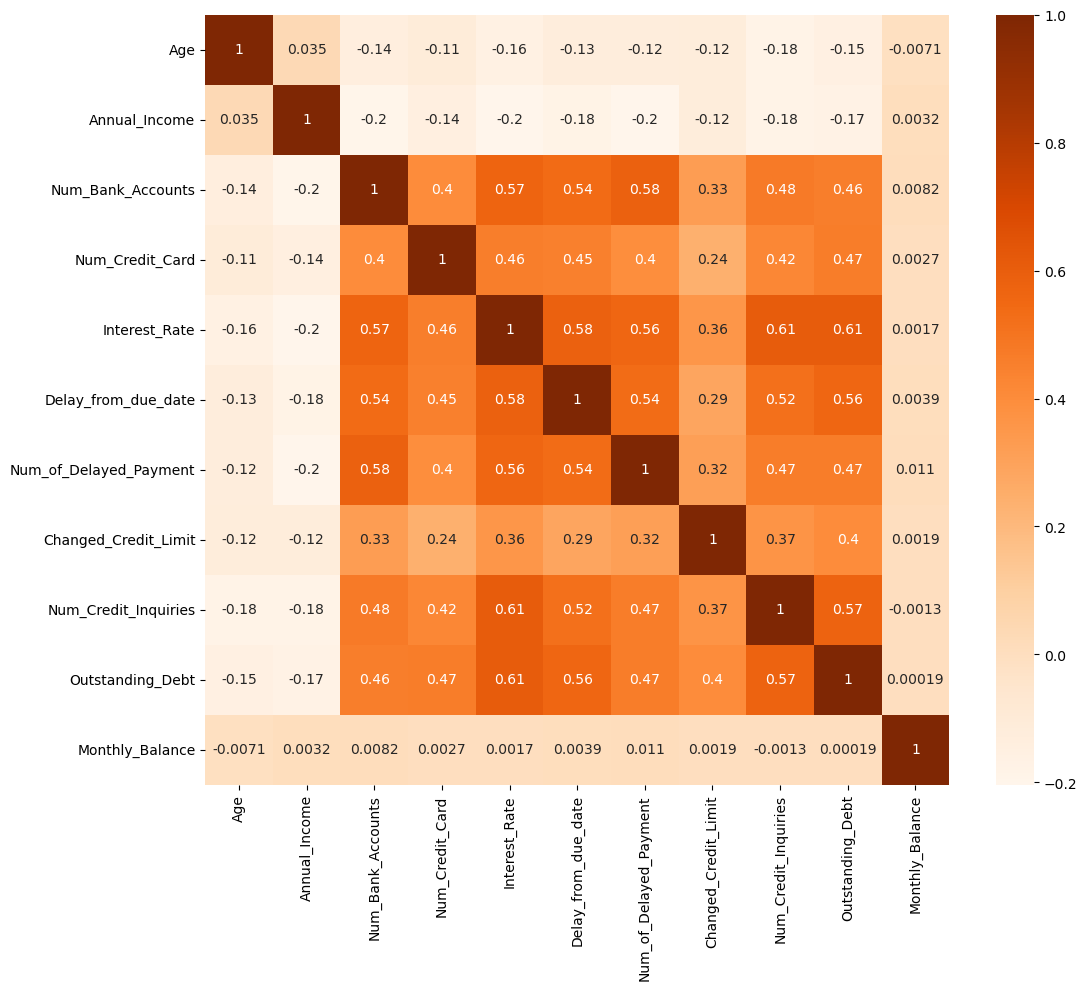

In [201]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
plt.show()


In [202]:
# Separate the numerical features based on the target variable categories
grouped_data = [X[y == category] for category in ['Good', 'Standard', 'Poor']]
# Perform ANOVA for each feature
for feature in X.columns:
    f_statistic, p_value = f_oneway(*[data[feature] for data in grouped_data])
    print(f"ANOVA results for {feature}: F-Statistic = {f_statistic}, p-value = {p_value}")

ANOVA results for Age: F-Statistic = 222.49647862730416, p-value = 9.425679632875477e-97
ANOVA results for Annual_Income: F-Statistic = 321.8802555801691, p-value = 2.9319454542528316e-139
ANOVA results for Num_Bank_Accounts: F-Statistic = 2645.3360672247873, p-value = 0.0
ANOVA results for Num_Credit_Card: F-Statistic = 3060.9345282192085, p-value = 0.0
ANOVA results for Interest_Rate: F-Statistic = 4280.399446118644, p-value = 0.0
ANOVA results for Delay_from_due_date: F-Statistic = 3904.0272830244303, p-value = 0.0
ANOVA results for Num_of_Delayed_Payment: F-Statistic = 2558.995526464156, p-value = 0.0
ANOVA results for Changed_Credit_Limit: F-Statistic = 847.8388888185214, p-value = 0.0
ANOVA results for Num_Credit_Inquiries: F-Statistic = 3338.161787024902, p-value = 0.0
ANOVA results for Outstanding_Debt: F-Statistic = 2937.6355945956993, p-value = 0.0
ANOVA results for Monthly_Balance: F-Statistic = 0.031242265360288443, p-value = 0.9692407579474553


In [203]:
# 'data' is the DataFrame containing the numerical features and the categorical target variable
data = pd.concat([X, y], axis=1)
# Perform ANOVA to get the F-statistic and p-value
anova = sm.formula.ols('Num_Bank_Accounts ~ C(Credit_Score)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)

# Perform Tukey HSD post-hoc test
tukey_results = pairwise_tukeyhsd(data['Num_Bank_Accounts'], data['Credit_Score'])

# Print ANOVA results
print("ANOVA Results:")
print(anova_table)

# Print Tukey HSD results
print("\nTukey HSD Results:")
print(tukey_results)

ANOVA Results:
                        sum_sq       df            F  PR(>F)
C(Credit_Score)   29913.854301      2.0  2645.336067     0.0
Residual         199814.992147  35340.0          NaN     NaN

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Good     Poor   2.6927   0.0  2.6044   2.781   True
  Good Standard   1.7688   0.0  1.6931  1.8446   True
  Poor Standard  -0.9239   0.0 -0.9965 -0.8513   True
-----------------------------------------------------


In [204]:
# Perform ANOVA to get the F-statistic and p-value
anova = sm.formula.ols('Monthly_Balance ~ C(Credit_Score)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)

# Perform Tukey HSD post-hoc test
tukey_results = pairwise_tukeyhsd(data['Monthly_Balance'], data['Credit_Score'])

# Print ANOVA results
print("ANOVA Results:")
print(anova_table)

# Print Tukey HSD results
print("\nTukey HSD Results:")
print(tukey_results)

ANOVA Results:
                       sum_sq       df         F    PR(>F)
C(Credit_Score)  9.821351e+47      2.0  0.031242  0.969241
Residual         5.554760e+53  35340.0       NaN       NaN

Tukey HSD Results:
                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
group1  group2          meandiff        p-adj           lower                  upper          reject
----------------------------------------------------------------------------------------------------
  Good     Poor    5.05555664648229e+21 0.9964 -1.4214116385067379e+23 1.5225227714363833e+23  False
  Good Standard  -7.345784741104835e+21 0.9898 -1.3364664564774389e+23  1.189550761655342e+23  False
  Poor Standard -1.2401341387587126e+22 0.9687 -1.3340685319716457e+23 1.0860417042199031e+23  False
----------------------------------------------------------------------------------------------------


In [205]:
# Perform ANOVA to get the F-statistic and p-value
anova = sm.formula.ols('Num_Credit_Card ~ C(Credit_Score)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)

# Perform Tukey HSD post-hoc test
tukey_results = pairwise_tukeyhsd(data['Num_Credit_Card'], data['Credit_Score'])

# Print ANOVA results
print("ANOVA Results:")
print(anova_table)

# Print Tukey HSD results
print("\nTukey HSD Results:")
print(tukey_results)

ANOVA Results:
                        sum_sq       df            F  PR(>F)
C(Credit_Score)   20207.635818      2.0  3060.934528     0.0
Residual         116653.564986  35340.0          NaN     NaN

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Good     Poor   2.2486   0.0  2.1811  2.3161   True
  Good Standard   1.1109   0.0   1.053  1.1688   True
  Poor Standard  -1.1377   0.0 -1.1932 -1.0822   True
-----------------------------------------------------


In [206]:
# Perform ANOVA to get the F-statistic and p-value
anova = sm.formula.ols('Interest_Rate ~ C(Credit_Score)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)

# Perform Tukey HSD post-hoc test
tukey_results = pairwise_tukeyhsd(data['Interest_Rate'], data['Credit_Score'])

# Print ANOVA results
print("ANOVA Results:")
print(anova_table)

# Print Tukey HSD results
print("\nTukey HSD Results:")
print(tukey_results)

ANOVA Results:
                       sum_sq       df            F  PR(>F)
C(Credit_Score)  4.609547e+05      2.0  4280.399446     0.0
Residual         1.902876e+06  35340.0          NaN     NaN

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Good     Poor  10.7309   0.0 10.4584 11.0033   True
  Good Standard   5.2049   0.0  4.9712  5.4387   True
  Poor Standard   -5.526   0.0 -5.7499  -5.302   True
-----------------------------------------------------


In [207]:
# Perform ANOVA to get the F-statistic and p-value
anova = sm.formula.ols('Age ~ C(Credit_Score)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)

# Perform Tukey HSD post-hoc test
tukey_results = pairwise_tukeyhsd(data['Age'], data['Credit_Score'])

# Print ANOVA results
print("ANOVA Results:")
print(anova_table)

# Print Tukey HSD results
print("\nTukey HSD Results:")
print(tukey_results)

ANOVA Results:
                       sum_sq       df           F        PR(>F)
C(Credit_Score)  4.747461e+04      2.0  222.496479  9.425680e-97
Residual         3.770291e+06  35340.0         NaN           NaN

Tukey HSD Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2  meandiff p-adj  lower   upper  reject
-----------------------------------------------------
  Good     Poor  -3.4401   0.0 -3.8236 -3.0566   True
  Good Standard   -1.635   0.0 -1.9641  -1.306   True
  Poor Standard   1.8051   0.0  1.4899  2.1204   True
-----------------------------------------------------


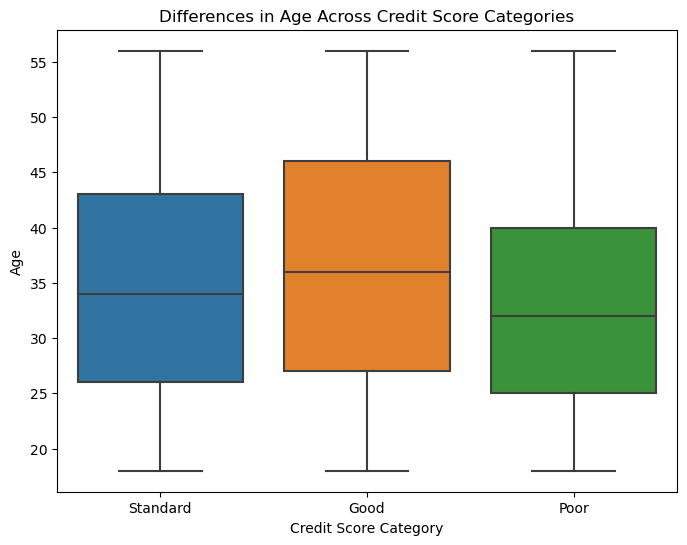

In [208]:
# Create a box plot to visualize Age across Credit Score categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Age', data=data)
plt.xlabel('Credit Score Category')
plt.ylabel('Age')
plt.title('Differences in Age Across Credit Score Categories')
plt.show()

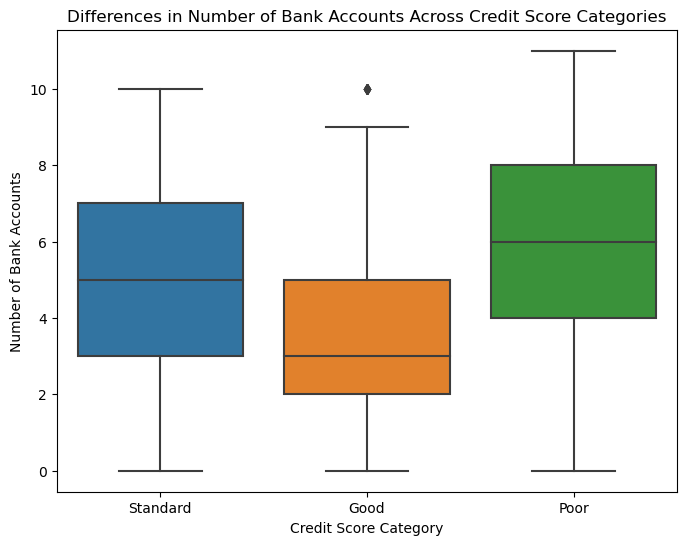

In [120]:
# Create a box plot to visualize Number of Bank Accounts across Credit Score categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=data)
plt.xlabel('Credit Score Category')
plt.ylabel('Number of Bank Accounts')
plt.title('Differences in Number of Bank Accounts Across Credit Score Categories')
plt.show()

In [209]:
# Read the CSV file into a Pandas DataFrame
test_df = pd.read_csv(
    Path('Resources/cleaned_data_test.csv')
)
test_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,28,_______,34847.84,2,4,6,1,3,1,5.42,5,Good,605.03,25.93,27.2,No,18.82,39.68,High_spent_Large_value_payments,485.30
1,28,Teacher,34847.84,2,4,6,1,3,3,5.42,5,Good,605.03,30.12,27.3,No,18.82,251.63,Low_spent_Large_value_payments,303.36
2,35,Engineer,143162.64,1,5,8,3,6,3,2.10,3,Good,1303.01,35.69,18.5,No,246.99,453.62,Low_spent_Large_value_payments,788.11
3,34,Lawyer,131313.40,0,1,8,2,0,2,9.34,4,Good,352.16,31.03,31.3,No,911.22,966.07,Low_spent_Large_value_payments,290.56
4,45,Journalist,31370.80,1,6,12,2,2,3,5.76,5,Good,421.43,33.85,27.2,No,46.62,109.42,High_spent_Medium_value_payments,376.49


In [210]:
columns_to_drop = ['Occupation', 'Num_of_Loan', 'Credit_Utilization_Ratio', 'Credit_History_Age',
                  'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Credit_Mix']
X2 = test_df.drop(columns=columns_to_drop)

In [211]:
# Encode the categorical variables using get_dummies
X2 = pd.get_dummies(X2)

In [212]:
# Preview the data
X2.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Monthly_Balance
0,28,34847.84,2,4,6,3,1,5.42,5,605.03,485.30
1,28,34847.84,2,4,6,3,3,5.42,5,605.03,303.36
2,35,143162.64,1,5,8,6,3,2.10,3,1303.01,788.11
3,34,131313.40,0,1,8,0,2,9.34,4,352.16,290.56
4,45,31370.80,1,6,12,2,3,5.76,5,421.43,376.49


In [213]:
X2.shape

(1780, 11)

In [214]:
# Re-fit the scaler on the original dataset
X_scaler.fit(X_train, y_train)
# Transform the new dataset X2 
X2_scaled = X_scaler.transform(X2)

In [215]:
len(X2_scaled)

1780

In [216]:
# predict on the 2nd dataset X2
y_pred_2 = model.predict(X2_scaled)


In [217]:
# Review the predictions
y_pred_2

array(['Good', 'Good', 'Poor', ..., 'Good', 'Standard', 'Good'],
      dtype=object)

In [218]:
y_test.value_counts()

Credit_Score
Standard    1442
Poor         655
Good         554
Name: count, dtype: int64

In [219]:
from collections import Counter
distribution = Counter(y_pred_2)
print(distribution)

Counter({'Good': 1074, 'Standard': 375, 'Poor': 331})


In [220]:
len(y_pred_2)

1780

In [221]:
# Calculate value counts for y_test
value_counts = np.unique(y_test, return_counts=True)

# Calculate percentages
total_samples = len(y_test)
percentages = value_counts[1] / total_samples * 100

# Sort the percentages in ascending order
sorted_percentages = sorted(zip(*value_counts, percentages), key=lambda x: x[1])

# Unzip the sorted percentages
values, counts, percentages = zip(*sorted_percentages)

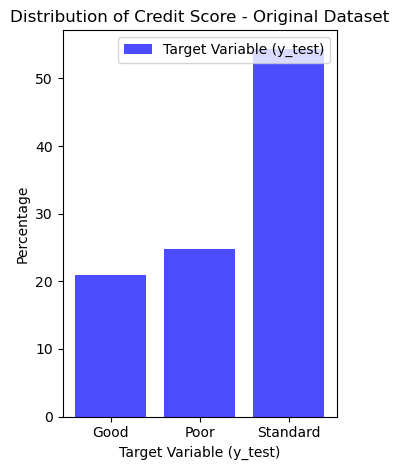

In [222]:
plt.subplot(1, 2, 1)
plt.bar(values, percentages, color='blue', alpha=0.7, label='Target Variable (y_test)')
plt.xlabel('Target Variable (y_test)')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Score - Original Dataset')
plt.legend()
plt.tight_layout()
plt.show()

In [223]:
# Calculate value counts for y_test
value_counts = np.unique(y_pred_2, return_counts=True)

# Calculate percentages
total_samples = len(y_pred_2)
percentages = value_counts[1] / total_samples * 100

# Sort the percentages in ascending order
sorted_percentages = sorted(zip(*value_counts, percentages), key=lambda x: x[1])

# Unzip the sorted percentages
values, counts, percentages = zip(*sorted_percentages)

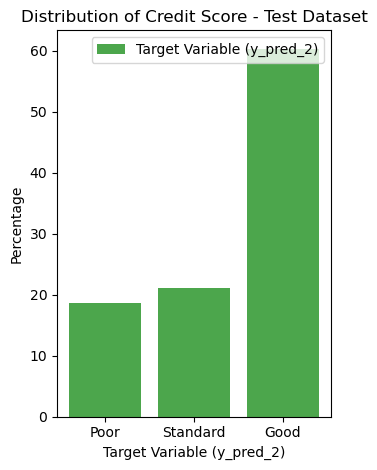

In [224]:
plt.subplot(1, 2, 2)
plt.bar(values, percentages, color='green', alpha=0.7, label='Target Variable (y_pred_2)')
plt.xlabel('Target Variable (y_pred_2)')
plt.ylabel('Percentage')
plt.title('Distribution of Credit Score - Test Dataset')
plt.legend()
plt.tight_layout()
plt.show()

In [225]:
# Calculate class distribution percentages for y_test
y_test_class_distribution = (pd.Series(y_test).value_counts(normalize=True) * 100).round()

# Calculate class distribution percentages for the new predictions
predictions_class_distribution = (pd.Series(y_pred_2).value_counts(normalize=True) * 100).round()

# Create a DataFrame to display the class distribution percentages in a grid
df = pd.DataFrame({
    'y_test (%)': y_test_class_distribution,
    'Predictions on New Test Data (%)': predictions_class_distribution
}).fillna(0)  # Fill NaN values with 0

print(df)

          y_test (%)  Predictions on New Test Data (%)
Good            21.0                              60.0
Poor            25.0                              19.0
Standard        54.0                              21.0
